In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("cleaned_f1_data_New.csv")

In [3]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Season', 'Round', 'Latitude', 'Longitude', 'Driver Age',
       'Driver Experience (Years)', 'Driver Championship Points',
       'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Grid Position',
       'Race Position', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank',
       'Total Pit Stops', 'Race Laps Completed'],
      dtype='object')


Dropping Columns which do not Contribute to target Variable and also have irrelevant values

In [4]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops']
df = df.drop(columns=to_drop, errors='ignore')
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Season', 'Round', 'Driver Age', 'Grid Position', 'Race Position',
       'Race Laps Completed'],
      dtype='object')


Storing the target variable into Seperate dataframe

In [5]:
# Now drop 'Race Position' from the updated numeric columns
pca_data = df[numeric_columns].drop(columns=['Race Position'], errors='ignore').copy() # Added errors='ignore' here to handle cases where 'Race Position' has already been dropped.
target_data = df['Race Position'].copy()
pca_data.head()
pca_data.to_csv('cleaned_f1_data_for_pca.csv', index=False)

In [6]:
pca_data.head()

,Season,Round,Driver Age,Grid Position,Race Laps Completed
0,1950,1,36,13,67
1,1950,1,44,15,67
2,1950,1,33,16,64
3,1950,1,35,20,64
4,1950,1,35,20,64


Normalize the data using StandardScaler

In [7]:
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

In [8]:
pca_data_scaled_df = pd.DataFrame(pca_data_scaled, columns=pca_data.columns)
pca_data_scaled_df.head()


,Season,Round,Driver Age,Grid Position,Race Laps Completed
0,-1.821821,-1.316851,1.095182,0.091218,0.997186
1,-1.821821,-1.316851,2.753721,0.355836,0.997186
2,-1.821821,-1.316851,0.473230,0.488145,0.896235
3,-1.821821,-1.316851,0.887864,1.017380,0.896235
4,-1.821821,-1.316851,0.887864,1.017380,0.896235


2 Component PCA

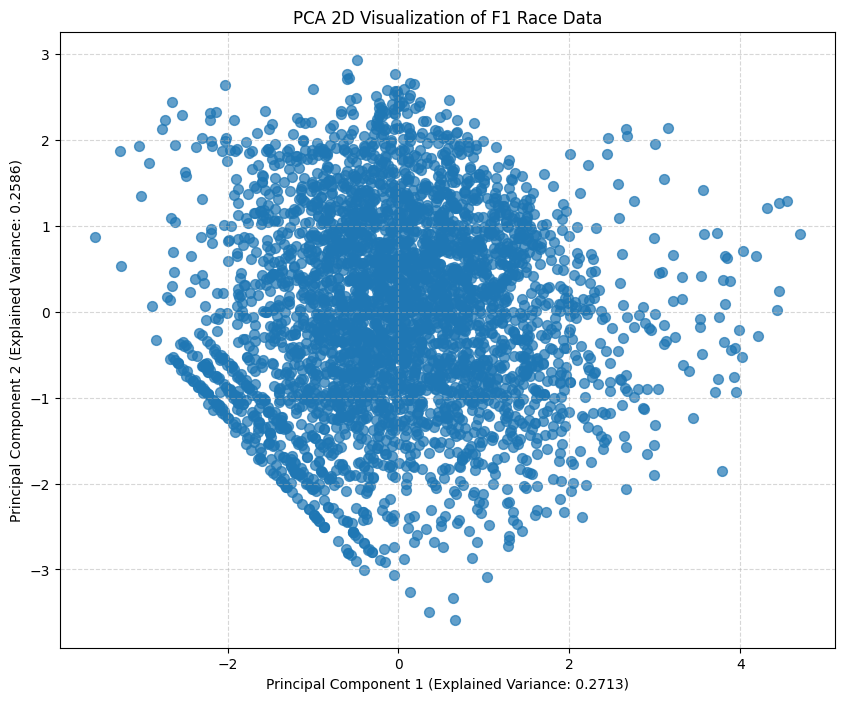

In [9]:
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(pca_data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result_2d[:, 0], pca_result_2d[:, 1], alpha=0.7, s=50)
plt.title('PCA 2D Visualization of F1 Race Data')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca_2d.explained_variance_ratio_[0]:.4f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca_2d.explained_variance_ratio_[1]:.4f})')
plt.grid(True, linestyle='--', alpha=0.5)

3 Component PCA

In [10]:

pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(pca_data_scaled)


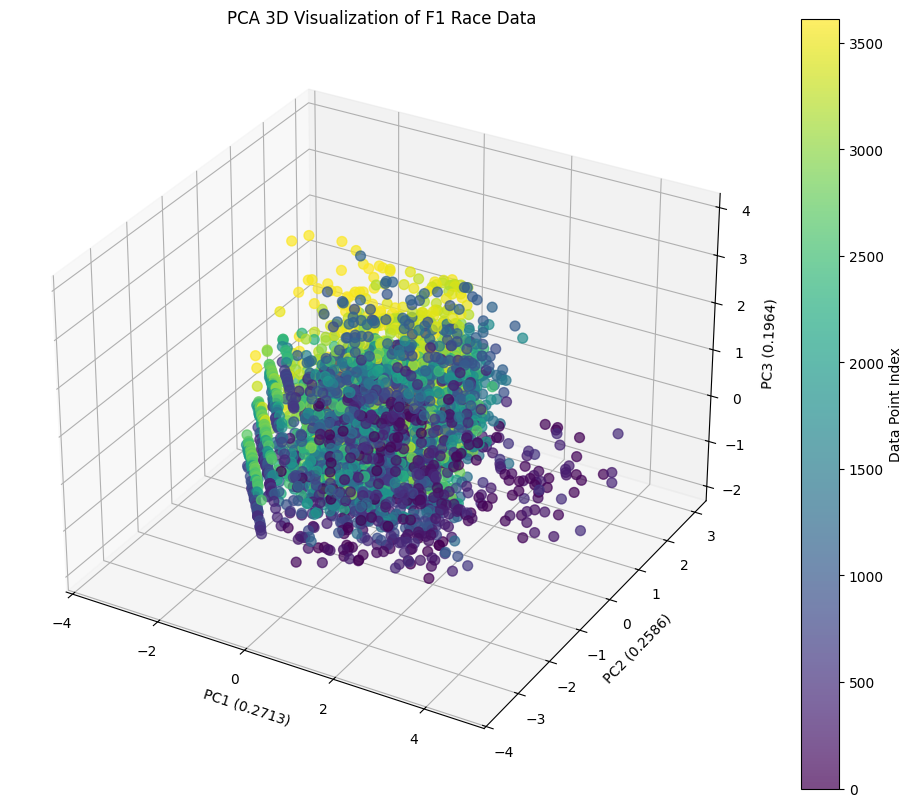

In [11]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2],
                     alpha=0.7, s=50, c=range(len(pca_result_3d)), cmap='viridis')

ax.set_title('PCA 3D Visualization of F1 Race Data')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.4f})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.4f})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.4f})')
plt.colorbar(scatter, ax=ax, label='Data Point Index')
plt.savefig('pca_3d_visualization.png', bbox_inches='tight')


In [12]:
pca_result_3d_df = pd.DataFrame(pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
pca_result_3d_df.head()

,PC1,PC2,PC3
0,1.798195,-1.425731,-1.338789
1,2.667417,-2.065531,-1.288584
2,1.605587,-0.926718,-1.473079
3,2.007515,-0.815920,-1.577964
4,2.007515,-0.815920,-1.577964


Explained Variance

In [13]:
explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_) * 100
print(f"\nPercentage of information retained in 2D PCA: {explained_variance_2d:.2f}%")
print(f"Individual explained variance ratios (2D): {pca_2d.explained_variance_ratio_}")

explained_variance_3d = np.sum(pca_3d.explained_variance_ratio_) * 100
print(f"\nPercentage of information retained in 3D PCA: {explained_variance_3d:.2f}%")
print(f"Individual explained variance ratios (3D): {pca_3d.explained_variance_ratio_}")


Percentage of information retained in 2D PCA: 52.99%
Individual explained variance ratios (2D): [0.27132429 0.25859274]

Percentage of information retained in 3D PCA: 72.63%
Individual explained variance ratios (3D): [0.27132429 0.25859274 0.19642047]


 Number of components needed for 95% variance

In [14]:
pca_full = PCA()
pca_full.fit(pca_data_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100

# Find number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_explained_variance >= 95) + 1
print(f"\nNumber of components needed to retain at least 95% variance: {n_components_95}")


Number of components needed to retain at least 95% variance: 5



Saved cumulative variance plot to 'cumulative_variance_plot.png'


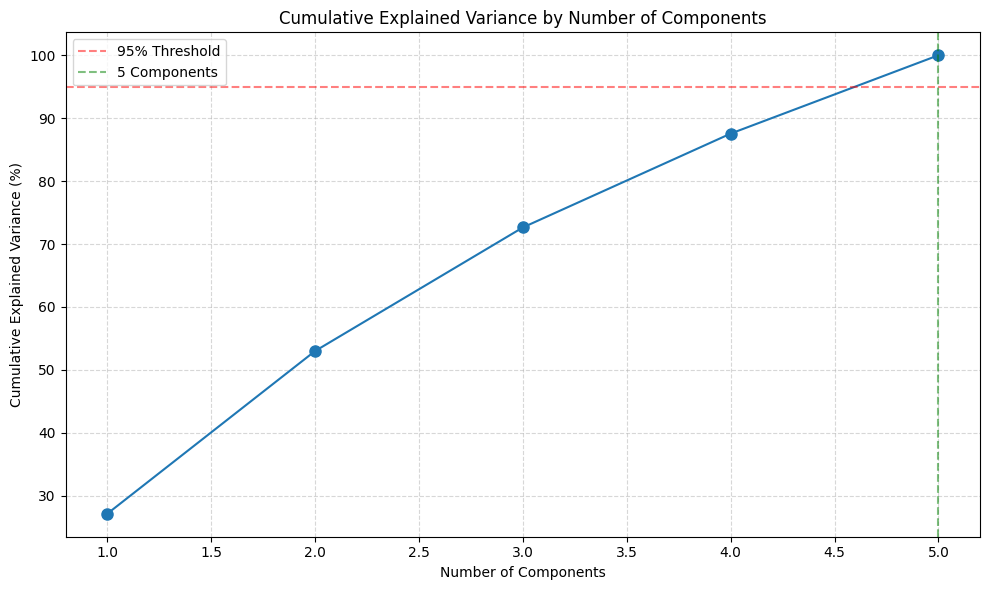

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', markersize=8)
plt.axhline(y=95, color='r', linestyle='--', alpha=0.5, label='95% Threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', alpha=0.5,
            label=f'{n_components_95} Components')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('cumulative_variance_plot.png', dpi=300)
print("\nSaved cumulative variance plot to 'cumulative_variance_plot.png'")

Top 3 Eigen values


Top three eigenvalues:
Eigenvalue 1: 1.3570
Eigenvalue 2: 1.2933
Eigenvalue 3: 0.9824


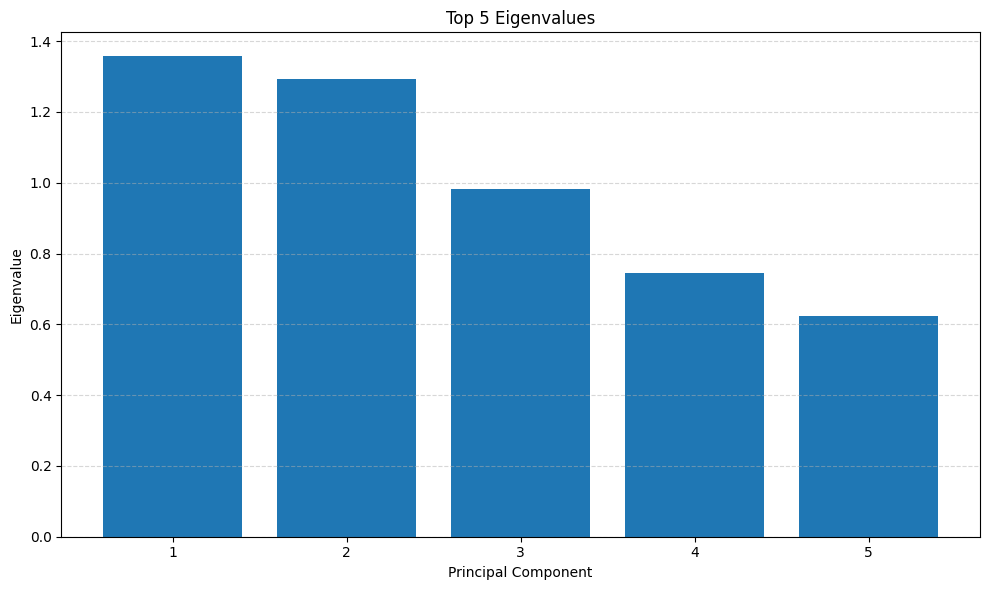

In [16]:
print("\nTop three eigenvalues:")
top_eigenvalues = pca_full.explained_variance_[:3]
for i, val in enumerate(top_eigenvalues, 1):
    print(f"Eigenvalue {i}: {val:.4f}")

# Create a bar chart for the eigenvalues
num_eigenvalues_to_plot = min(10, len(pca_full.explained_variance_))  # Limit to available eigenvalues
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_eigenvalues_to_plot + 1), pca_full.explained_variance_[:num_eigenvalues_to_plot])
plt.title('Top 5 Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, num_eigenvalues_to_plot + 1))  # Adjust x-axis ticks
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('eigenvalues_barchart.png', dpi=300)

Feature Contributions

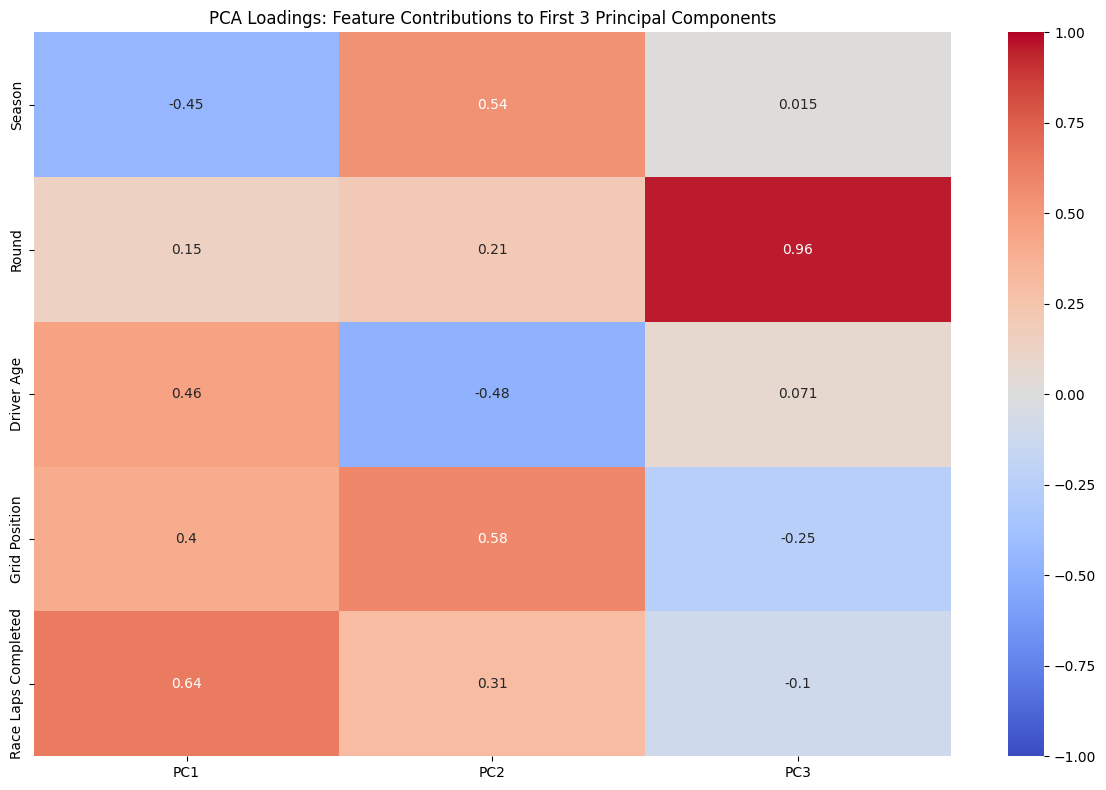

In [17]:
component_names = [f'PC{i+1}' for i in range(3)]
loadings = pd.DataFrame(
    pca_full.components_[:3].T,
    columns=component_names,
    index=pca_data.columns
)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('PCA Loadings: Feature Contributions to First 3 Principal Components')
plt.tight_layout()
plt.savefig('pca_feature_loadings.png', dpi=300)

Summary

In [18]:
print("\n=== PCA Analysis Summary ===")
print(f"- Dataset contains {pca_data.shape[1]} numeric features and {pca_data.shape[0]} samples")
print(f"- Information retained in 2D PCA: {explained_variance_2d:.2f}%")
print(f"- Information retained in 3D PCA: {explained_variance_3d:.2f}%")
print(f"- Components needed for ≥95% variance: {n_components_95}")
print(f"- Top 3 eigenvalues: {', '.join([f'{val:.4f}' for val in top_eigenvalues])}")


=== PCA Analysis Summary ===
- Dataset contains 5 numeric features and 3616 samples
- Information retained in 2D PCA: 52.99%
- Information retained in 3D PCA: 72.63%
- Components needed for ≥95% variance: 5
- Top 3 eigenvalues: 1.3570, 1.2933, 0.9824
